# IAU-PROJEKT, STAHOVEC a VIEST
------------------------------------------------
Projekt začína základnými importmi pre knižnice, ktoré budeme v projekte používať

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import mannwhitneyu
import statsmodels.api as sm

sns.set_theme(style="whitegrid", palette="coolwarm")
sns.set_palette("coolwarm")

Hneď na začiatok si **načítame dáta** zo súboru funkciou **read_csv()**
Následne vykonáme prvú "čistiacu" operáciu, v ktorej vymažeme prvý stĺpec, v ktorom
je očíslovanie stĺpcov, ktoré je pre našu analýzu zbytočné.

In [2]:
# sns.set_palette("vlag")
data_labor = pd.read_csv("dataset/labor.csv", sep="\t")
# del data["Unnamed: 0"]
data_labor = data_labor.iloc[:, 1:]
data_labor

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,ssn,name,trombocyty,alp,relationship,indicator,er-cv,weight,ast,hematokrit
0,yes,4.98718,8.89463,2.40520,5.75830,6.93712,4.54976,021-87-4523,Jeremy Tanner,6.23782,45.93625,divoced,0.0,55.43592,-2.73558,51.62366,3.34206
1,yes,6.67732,4.21847,0.66072,6.29064,5.19990,4.10863,513-39-9691,Jocelyn Kelly,6.27100,20.30249,divoced,0.0,45.34617,81.56533,61.59374,5.78180
2,no,6.51444,7.94461,1.28337,5.83567,6.88758,6.45793,881-46-4810,Crystal Kelley,6.02783,82.09305,divoced,0.0,29.29190,151.24191,47.96329,4.55230
3,no,6.05025,7.67537,0.83197,6.33300,4.45912,6.96013,826-16-7757,Doris Duncan,6.83876,69.43441,divoced,1.0,60.47398,83.89451,57.47174,7.17271
4,yes,6.20737,7.84993,0.93395,5.66904,4.88628,6.41332,167-37-6059,John Parks,5.75903,90.09567,divoced,1.0,41.10299,107.22958,34.25820,6.93681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9966,Y,5.17020,5.61728,0.60775,5.35296,4.59956,5.52802,425-94-7489,Ryan Pineda,3.86179,75.76127,single,0.0,38.06206,60.90926,41.67857,4.57350
9967,no,5.70666,8.82840,2.35342,5.20966,3.73586,6.25482,375-27-0860,Travis Brown,5.03429,85.17538,widowed,1.0,48.35999,106.88451,23.49894,7.00122
9968,Y,6.45549,6.83179,0.62415,7.84688,4.52864,5.57765,300-91-9095,Michelle Watson,6.38035,79.13200,married,1.0,28.09339,75.74349,23.52645,6.94466
9969,Y,4.81311,7.26178,0.84372,6.76794,7.54696,7.07142,691-20-7896,Ryan Hahn,5.27933,79.64629,married,0.0,56.63966,52.15898,31.12380,4.98399


V tejto časti očistíme dáta v stĺpci **smoker**, kde všetky nejednotné záznamy
nahradíme numerickými reprezentáciámi možností áno/nie.

In [3]:
data_labor["smoker"] = data_labor["smoker"].str.replace("yes", "1")
data_labor["smoker"] = data_labor["smoker"].str.replace("no", "0")
data_labor["smoker"] = data_labor["smoker"].str.replace("Y", "1")
data_labor["smoker"] = data_labor["smoker"].str.replace("N", "0")
data_labor["smoker"] = data_labor["smoker"].astype(float)

data_labor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9971 entries, 0 to 9970
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   smoker        9971 non-null   float64
 1   hbver         9940 non-null   float64
 2   erytrocyty    9939 non-null   float64
 3   alt           9941 non-null   float64
 4   leukocyty     9941 non-null   float64
 5   etytr         9940 non-null   float64
 6   hemoglobin    9940 non-null   float64
 7   ssn           9971 non-null   object 
 8   name          9971 non-null   object 
 9   trombocyty    9941 non-null   float64
 10  alp           9941 non-null   float64
 11  relationship  9971 non-null   object 
 12  indicator     9971 non-null   float64
 13  er-cv         9941 non-null   float64
 14  weight        9971 non-null   float64
 15  ast           9941 non-null   float64
 16  hematokrit    9941 non-null   float64
dtypes: float64(14), object(3)
memory usage: 1.3+ MB


V nasledujúcej bunke sme **nahradili chýbajúce hodnoty** priemerom v danom stĺpci.
Túto operáciu sme mohli vykonať z dôvodu, že všetky **chýbajúce hodnoty** boli iba v tých
stĺpcoch, ktoré obsahujú **numerické hodnoty** (float64).

In [4]:
data_labor = data_labor.fillna(data_labor.mean())
data_labor

/tmp/ipykernel_30056/3025875362.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_labor = data_labor.fillna(data_labor.mean())


,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,ssn,name,trombocyty,alp,relationship,indicator,er-cv,weight,ast,hematokrit
0,1.0,4.98718,8.89463,2.40520,5.75830,6.93712,4.54976,021-87-4523,Jeremy Tanner,6.23782,45.93625,divoced,0.0,55.43592,-2.73558,51.62366,3.34206
1,1.0,6.67732,4.21847,0.66072,6.29064,5.19990,4.10863,513-39-9691,Jocelyn Kelly,6.27100,20.30249,divoced,0.0,45.34617,81.56533,61.59374,5.78180
2,0.0,6.51444,7.94461,1.28337,5.83567,6.88758,6.45793,881-46-4810,Crystal Kelley,6.02783,82.09305,divoced,0.0,29.29190,151.24191,47.96329,4.55230
3,0.0,6.05025,7.67537,0.83197,6.33300,4.45912,6.96013,826-16-7757,Doris Duncan,6.83876,69.43441,divoced,1.0,60.47398,83.89451,57.47174,7.17271
4,1.0,6.20737,7.84993,0.93395,5.66904,4.88628,6.41332,167-37-6059,John Parks,5.75903,90.09567,divoced,1.0,41.10299,107.22958,34.25820,6.93681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9966,1.0,5.17020,5.61728,0.60775,5.35296,4.59956,5.52802,425-94-7489,Ryan Pineda,3.86179,75.76127,single,0.0,38.06206,60.90926,41.67857,4.57350
9967,0.0,5.70666,8.82840,2.35342,5.20966,3.73586,6.25482,375-27-0860,Travis Brown,5.03429,85.17538,widowed,1.0,48.35999,106.88451,23.49894,7.00122
9968,1.0,6.45549,6.83179,0.62415,7.84688,4.52864,5.57765,300-91-9095,Michelle Watson,6.38035,79.13200,married,1.0,28.09339,75.74349,23.52645,6.94466
9969,1.0,4.81311,7.26178,0.84372,6.76794,7.54696,7.07142,691-20-7896,Ryan Hahn,5.27933,79.64629,married,0.0,56.63966,52.15898,31.12380,4.98399


In [5]:
data_labor.describe()

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,trombocyty,alp,indicator,er-cv,weight,ast,hematokrit
count,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000
mean,0.406278,6.071692,6.842049,1.120983,6.064355,5.318564,6.062952,6.084395,54.622262,0.643165,51.121580,70.305658,50.459989,6.461410
std,0.491162,1.000834,1.460087,2.019724,1.009118,1.393256,1.741981,1.006202,26.103211,0.479090,12.856008,34.976941,12.771838,1.617865
min,0.000000,2.148000,1.103640,0.000000,2.239400,0.548790,0.000000,2.587100,0.000000,0.000000,0.000000,-54.061950,0.000000,1.991860
25%,0.000000,5.401305,6.037930,0.563945,5.393100,4.444160,4.780500,5.407585,31.460750,0.000000,42.546015,46.128010,41.770680,5.127505
50%,0.000000,6.071692,7.004430,0.780950,6.071080,5.120390,6.115310,6.084395,58.533820,1.000000,50.954600,70.793900,50.618370,6.753050
75%,1.000000,6.742105,7.807580,1.166560,6.730190,6.019805,7.378890,6.765420,78.880725,1.000000,59.861495,94.071090,59.039665,7.490275
max,1.000000,10.532500,12.769020,100.000000,9.767710,10.673750,11.720370,9.774760,100.000000,1.000000,100.000000,194.734070,100.000000,13.021170


# 1. fáza - Prieskumná analýza

## a) Základný opis dát spolu s ich charakteristikami
-------------------------------------------------------
Základné informácie o datasete:

In [6]:
print(f"Počet záznamov v našom datasete: {len(data_labor.index)}")
print(f"Počet atribútov v našom datasete: {len(data_labor.columns)}")
# print(f"Dátové typy v našom datasete:\n {data_labor.dtypes}")
print(f"Dátové typy v našom datasete: {list(set(data_labor.dtypes))}")

Počet záznamov v našom datasete: 9971
Počet atribútov v našom datasete: 17
Dátové typy v našom datasete: [dtype('O'), dtype('float64')]


V tejto časti uvedieme pre zvolené **významné atribúty ich distribúcie a základné
deskriptívne štatistiky.**
Medzi tieto významné atribúty patria **erytrocyty, leukocyty, trombocyty a váha**.
Pre ich deskriptívne štatistiky uvádzame **medián, modus, priemer, rozptyl a smerodajnú odchylku.**
<br>

Hodnota modusu je väčšinou **rovná priemeru**, keďže nahradzujeme chýbajúce hodnoty priemerom. Je
potrebné brať tieto hodnoty s rezervou, keďže dáta ešte neboli očistené a mnoho záznamov spadá
do surreálnych hodnôt (napr. záporne záznamy pre atribút váhy).
</br>

###  Erytrocyty

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[erytrocyty] Medián:   7.00443
[erytrocyty] Modus:    6.842048781567562
[erytrocyty] Priemer:  6.842048781567561
[erytrocyty] Rozptyl:  2.1316401076201124
[erytrocyty] Smerodajná odchylka:  1.4600137354217297


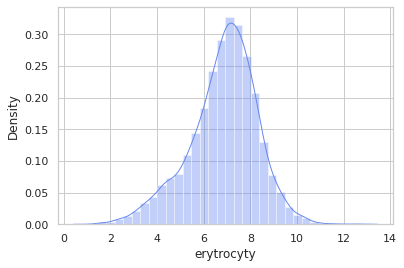

In [7]:
sns.distplot(data_labor["erytrocyty"], kde=True, kde_kws={"lw": 1}, bins=32)
# sns.histplot(data=data_labor, x="erytrocyty", bins=24, kde=True)
print(f"[erytrocyty] Medián:  ", data_labor["erytrocyty"].median())
print(f"[erytrocyty] Modus:   ", data_labor.mode()["erytrocyty"][0])
print(f"[erytrocyty] Priemer: ", data_labor["erytrocyty"].mean())
print(f"[erytrocyty] Rozptyl: ", np.var(data_labor["erytrocyty"]))
print(f"[erytrocyty] Smerodajná odchylka: ", np.std(data_labor["erytrocyty"]))

### Leukocyty

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[leukocyty] Medián:   6.07108
[leukocyty] Modus:    6.064355209737452
[leukocyty] Priemer:  6.0643552097374505
[leukocyty] Rozptyl:  1.0182179280312194
[leukocyty] Smerodajná odchylka:  1.0090678510542388


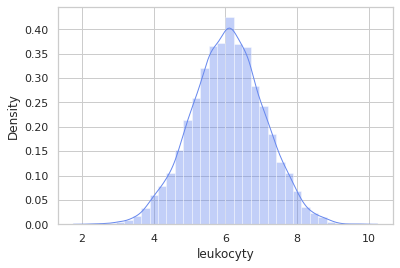

In [8]:
sns.distplot(data_labor["leukocyty"], kde=True, kde_kws={"lw": 1}, bins=32)
# sns.histplot(data=data_labor, x="leukocyty", bins=24, kde=True)
print(f"[leukocyty] Medián:  ", data_labor["leukocyty"].median())
print(f"[leukocyty] Modus:   ", data_labor.mode()["leukocyty"][0])
print(f"[leukocyty] Priemer: ", data_labor["leukocyty"].mean())
print(f"[leukocyty] Rozptyl: ", np.var(data_labor["leukocyty"]))
print(f"[leukocyty] Smerodajná odchylka: ", np.std(data_labor["leukocyty"]))


### Trombocyty

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[trombocyty] Medián:   6.084394732924253
[trombocyty] Modus:    6.084394732924253
[trombocyty] Priemer:  6.084394732924253
[trombocyty] Rozptyl:  1.0123415736654913
[trombocyty] Smerodajná odchylka:  1.0061518641166904


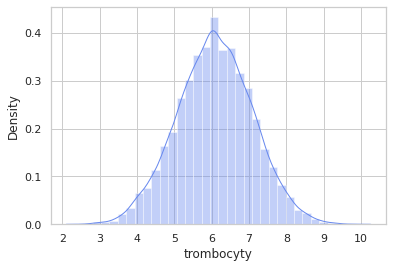

In [9]:
sns.distplot(data_labor["trombocyty"], kde=True, kde_kws={"lw": 1}, bins=32)
# sns.histplot(data=data_labor, x="trombocyty", bins=24, kde=True)
print(f"[trombocyty] Medián:  ", data_labor["trombocyty"].median())
print(f"[trombocyty] Modus:   ", data_labor.mode()["trombocyty"][0])
print(f"[trombocyty] Priemer: ", data_labor["trombocyty"].mean())
print(f"[trombocyty] Rozptyl: ", np.var(data_labor["trombocyty"]))
print(f"[trombocyty] Smerodajná odchylka: ", np.std(data_labor["trombocyty"]))

### Váha

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[weight] Medián:   70.7939
[weight] Modus:    -13.06891
[weight] Priemer:  70.30565801624712
[weight] Rozptyl:  1223.2637015794558
[weight] Smerodajná odchylka:  34.9751869413082


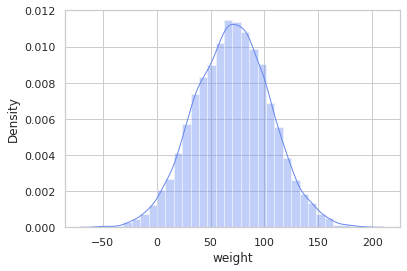

In [10]:
sns.distplot(data_labor["weight"], kde=True, kde_kws={"lw": 1}, bins=32)
# sns.histplot(data=data_labor, x="weight", bins=24, kde=True)
print(f"[weight] Medián:  ", data_labor["weight"].median())
print(f"[weight] Modus:   ", data_labor.mode()["weight"][0])
print(f"[weight] Priemer: ", data_labor["weight"].mean())
print(f"[weight] Rozptyl: ", np.var(data_labor["weight"]))
print(f"[weight] Smerodajná odchylka: ", np.std(data_labor["weight"]))

## b) Párová analýza dát
-------------------------------------------------------
### **Skúmanie vzťahov medzi dvojicami atribútov**

<br>

V tejto časti zisťujeme **závislosti** medzi rôznymi atribútmi po dvojiciach. Keďže naše dáta
ešte stále nie sú očistené, výsledné závislosti **nemôžu byť stopercentne korektné**.
</br>
<br>
Na začiatok sme vykreslili **heatmapu**, z ktorej môžeme vyčítať **závislosti medzi všetkými dvojicami
atribútov**. Vďaka tomu máme všeobecný prehľad o koreláciách v našom datasete.
</br>

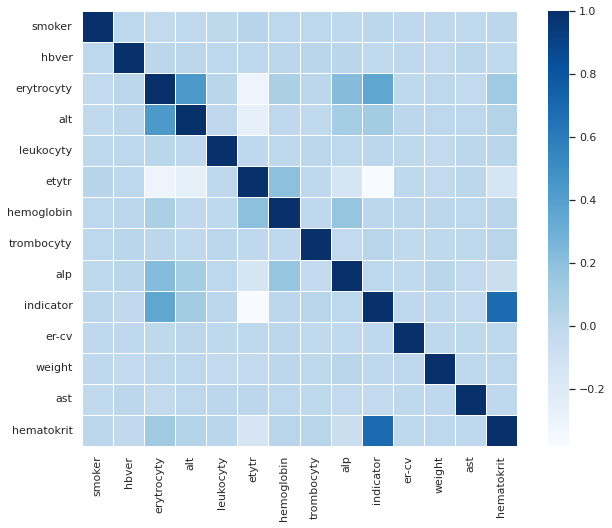

In [11]:
fig, ax = plt.subplots(figsize=(11, 8))
heatmap = sns.heatmap(data_labor.corr(), linewidths=.5, square=True, linewidth=0.5, cmap="Blues")
# heatmap.set_title('Correlation Heatmap', fontdict={'font':12}, pad=12);

Heatmapa z prechádzajúcej bunky nám napovedá, ktoré atribúty môžeme skúmať z hľadiska závislostí.
Na začiatok si vyberieme dvojice, ktoré majú vyšší koeficient korelácie, a teda tie
dvojice atribútov od seba závisia.
<br>
### Erytrocyty a alt
Na tomto grafe môžeme pozerať **silnú závislosť**, keďže rozptyl dát je exponenciálna krivka.
Pri atribútoch, ktoré nekorelujú, budeme vidieť rôzne atypické "machule".
</br>

<AxesSubplot:xlabel='erytrocyty', ylabel='alt'>

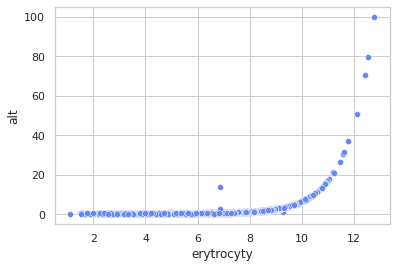

In [12]:
sns.scatterplot(data=data_labor, x="erytrocyty", y="alt")

### Hemoglobín a alp
Na danom grafe pozorujeme **sínusovú závislosť**, keďže osciluje v pravidelnom intervale.
V približnom odhade môžeme tvrdiť, že hodnoty atribútu alp dosahujú maximum vtedy,
ak sa hodnota hemoglobínu blíži k 6% a periodicky osciluje po približne šiestich
percentách.

<AxesSubplot:xlabel='hemoglobin', ylabel='alp'>

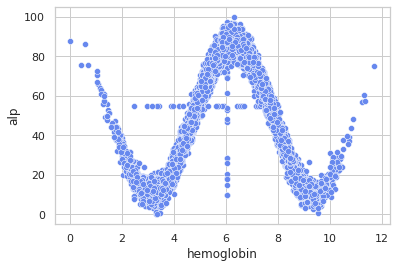

In [13]:
sns.scatterplot(data=data_labor, x="hemoglobin", y="alp")

### Hemoglobin a etytr
V danom porovnaní môžeme pozorovať miernu pozitívnu koreláciu medzi zvolenými atribútmi.

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(


<AxesSubplot:xlabel='hemoglobin', ylabel='etytr'>

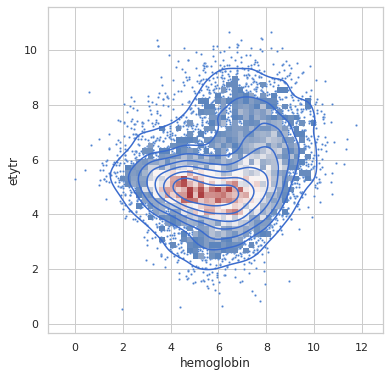

In [14]:
plt.subplots(figsize=(6, 6))
sns.scatterplot(data=data_labor, x="hemoglobin", y="etytr", s=5, color="#4c81d0")
sns.histplot(data=data_labor, x="hemoglobin", y="etytr", bins=50, pthresh=.1, cmap="vlag", shrink=.4)
sns.kdeplot(data=data_labor, x="hemoglobin", y="etytr", levels=8, color="#3b6cce", linewidth=.75)

Po relatívne závislých atribútoch sme prešli k prípadom, kedy sa korelácie pohybujú v záporných
hodnotách.

### Erytrocyty a Leukocyty
Ako prvú máme vykreslenú závislosť medzi atribútmi erytrocyty a leukocyty, ktorých hodnota korelácie
sa blíži v rádoch stotín k nule.

Nulová korelácia je pozorovateľná na grafe, keďže výskyt závislosti je roztrúsený v kruhovom tvare
uprostred grafu.

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(


<AxesSubplot:xlabel='erytrocyty', ylabel='leukocyty'>

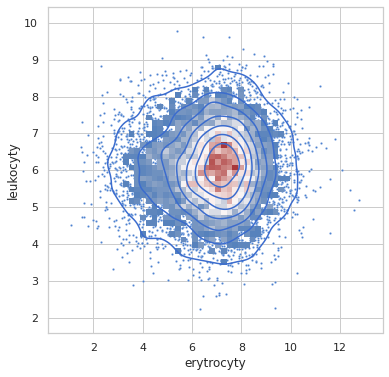

In [15]:
# sns.scatterplot(data=data_labor, x="erytrocyty", y="leukocyty")

plt.subplots(figsize=(6, 6))
sns.scatterplot(data=data_labor, x="erytrocyty", y="leukocyty", s=5, color="#4c81d0")
sns.histplot(data=data_labor, x="erytrocyty", y="leukocyty", bins=50, pthresh=.1, cmap="vlag", shrink=.4)
sns.kdeplot(data=data_labor, x="erytrocyty", y="leukocyty", levels=8, color="#3b6cce", linewidth=.75)

### Erytrocyty a etytr
Pri porovnaní atribútov **erytrocyty** a **etytr** pozorujeme stredne veľkú negatívnu koreláciu,
keďže rozptyl dát je "negatívne naklonený", čo znamená, že pri rastúcej hodnote erytrocytov
klesá hodnota atribútu etytr.

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(


<AxesSubplot:xlabel='erytrocyty', ylabel='etytr'>

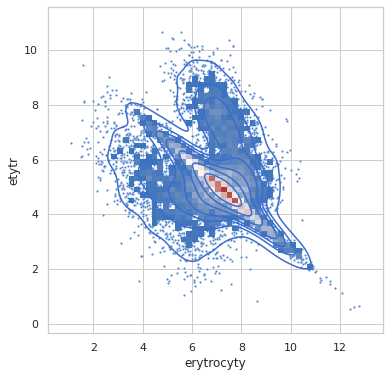

In [16]:
plt.subplots(figsize=(6, 6))
sns.scatterplot(data=data_labor, x="erytrocyty", y="etytr", s=5, color="#4c81d0")
sns.histplot(data=data_labor, x="erytrocyty", y="etytr", bins=50, pthresh=.1, cmap="vlag", shrink=.4)
sns.kdeplot(data=data_labor, x="erytrocyty", y="etytr", levels=8, color="#3b6cce", linewidth=.75)

### **Skúmanie závislostí medzi predikovanou premennou a ďalšími atribútmi**
V tejto časti sa povenujeme **závislostiam medzi predikovanou premennou** a ostatnými premennými.
Predikovaná premenná je v našom prípade **indicator**.

### Indikátor a erytrocyty (0.36)

Z heatmapy vieme vyčítať, že dvojica atribútov indikátor a erytrocyty je **mierne pozitívne závislá**.
Tieto rozdiely sú badateľné na grafe nižšie, keďže zhluky dát sú zľahka rozdielne deformované a
vertikálne posunuté.

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


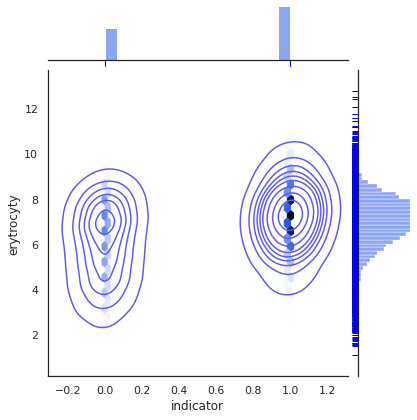

In [17]:
with sns.axes_style('white'):
    graph = sns.jointplot("indicator", "erytrocyty", data=data_labor, kind='hex')
    graph.plot_joint(sns.kdeplot, color="#5e5ce9")
    graph.plot_marginals(sns.rugplot, color="blue", height=-.12, clip_on=False)

<AxesSubplot:xlabel='indicator', ylabel='erytrocyty'>

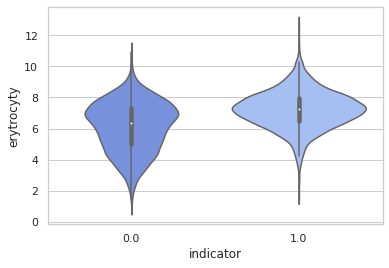

In [18]:
sns.violinplot(data=data_labor, x='indicator', y = 'erytrocyty')

### Indikátor a hematokrit (0.69)

Na tejto dvojici atribútov pozorujeme veľmi **silnú pozitívnu závislosť**, ktorá je viditeľná na oboch
typoch grafov (violin aj jointplotu). S nárastom hodnoty indikátoru z 0 na 1 výrazne rastie
aj hodnota hematokritu.

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


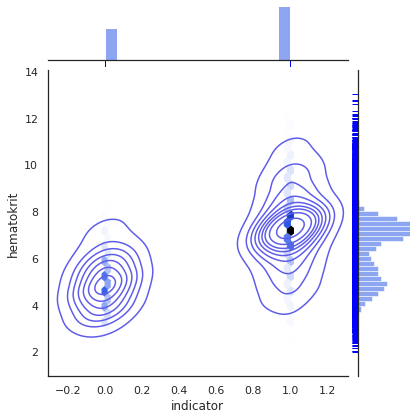

In [19]:
with sns.axes_style('white'):
    graph = sns.jointplot("indicator", "hematokrit", data=data_labor, kind='hex')
    graph.plot_joint(sns.kdeplot, color="#5e5ce9")
    graph.plot_marginals(sns.rugplot, color="blue", height=-.12, clip_on=False)

<AxesSubplot:xlabel='indicator', ylabel='hematokrit'>

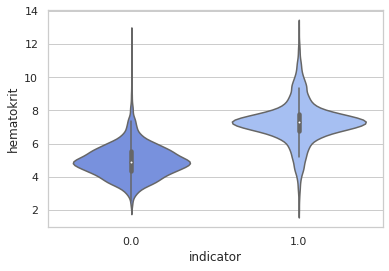

In [20]:
sns.violinplot(data=data_labor, x='indicator', y = 'hematokrit')


### Indikátor a trombocyty (0.027)

**Takmer nulová závislosť** - hodnoty hematokritu sú takmer zhodné pre rôzne hodnoty indikátoru.

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


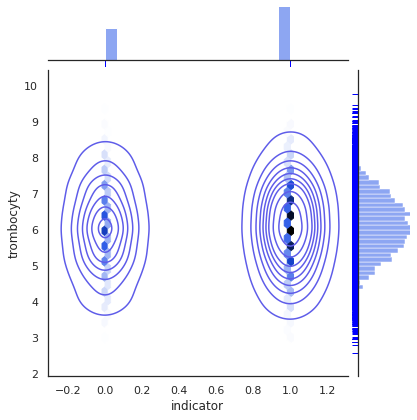

In [21]:
with sns.axes_style('white'):
    graph = sns.jointplot("indicator", "trombocyty", data=data_labor, kind='hex')
    graph.plot_joint(sns.kdeplot, color="#5e5ce9")
    graph.plot_marginals(sns.rugplot, color="blue", height=-.12, clip_on=False)

<AxesSubplot:xlabel='indicator', ylabel='trombocyty'>

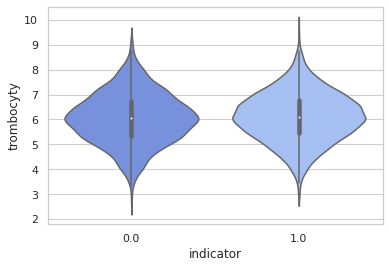

In [22]:
sns.violinplot(data=data_labor, x='indicator', y = 'trombocyty')

### Indikátor a etytr (-0.38)

**Mierne negatívna závislosť** je viditeľná tak, že pri náraste hodnoty indikátoru klesá
hodnota atribútu etytr. Distribúcia pri rôznom indikátore je taktiež **odlišná**.

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


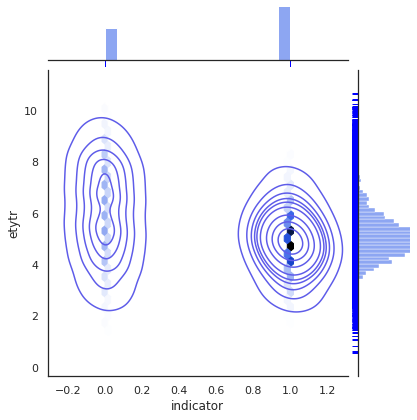

In [23]:
with sns.axes_style('white'):
    graph = sns.jointplot("indicator", "etytr", data=data_labor, kind='hex')
    graph.plot_joint(sns.kdeplot, color="#5e5ce9")
    graph.plot_marginals(sns.rugplot, color="blue", height=-.12, clip_on=False)

<AxesSubplot:xlabel='indicator', ylabel='etytr'>

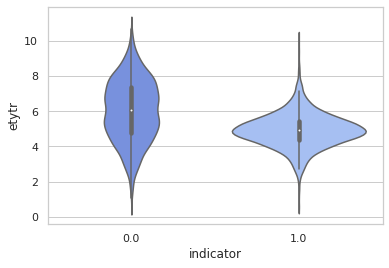

In [24]:
sns.violinplot(data=data_labor, x='indicator', y = 'etytr')

## c) Formulácia a štatistické overenie hypotéz o dátach
-------------------------------------------------------
### Formulácia hypotéz

#### 1. Hypotéza:
##### (**H0**): Pacienti v lepšom stave majú vyššie hodnoty erytrocytov v krvi.
##### (**H1**): Pacienti v lepšom stave majú nižšie hodnoty erytrocytov v krvi.

#### 2. Hypotéza:
##### (**H0**): Ak je pacient v horšom stave, hodnoty objemu krviniek (hematokrit) sú nižšie.
##### (**H1**): Ak je pacient v horšom stave, hodnoty objemu krviniek (hematokrit) sú vyššie.
-------------------------------------------------------

Tieto hypotézy sme si zvolili z toho dôvodu, že predchádzajúca časť nám naznačila tieto poznatky,
z ktorých vychádzajú dané hypotézy. Pred samotným začiatkom štatistického overenia hypotéz
vykreslíme zopár grafov, z ktorých zistíme, či sú dané **dáta vhodné** na použitie štatistických
testov.

#### 1. Hypotéza:

V prvom boxenplote môžeme vidieť iný typ porovnania závislostí indikátora od erytrocytov, ako
sme použili v predchádzajúcej časti, no výsledok je v podstate rovnaký.

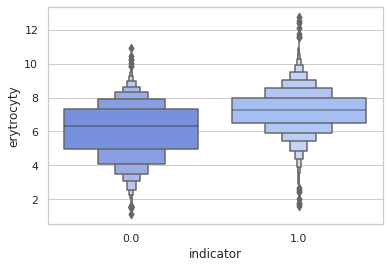

In [25]:
g = sns.boxenplot(data=data_labor, x='indicator', y = 'erytrocyty')

Následne skontrolujeme atribúty indikátor a erytrocyty a ich hodnoty, napr. či sú ich distribúcie
normálne alebo či ich dáta nezasahujú do záporných hodnôt, čo je z logického hľadiska nezmysel.

In [26]:
data_labor[['erytrocyty', 'indicator']].describe()

,erytrocyty,indicator
count,9971.000000,9971.000000
mean,6.842049,0.643165
std,1.460087,0.479090
min,1.103640,0.000000
25%,6.037930,0.000000
50%,7.004430,1.000000
75%,7.807580,1.000000
max,12.769020,1.000000


/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[erytrocyty] Medián:   7.00443
[erytrocyty] Modus:    6.842048781567562
[erytrocyty] Priemer:  6.842048781567561
[erytrocyty] Rozptyl:  2.1316401076201124
[erytrocyty] Smerodajná odchylka:  1.4600137354217297


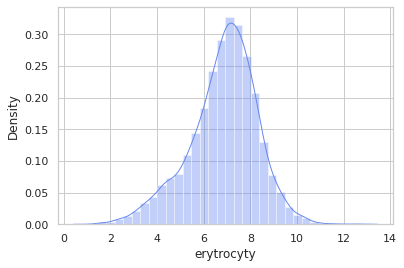

In [27]:
sns.distplot(data_labor["erytrocyty"], kde=True, kde_kws={"lw": 1}, bins=32)
# sns.histplot(data=data_labor, x="erytrocyty", bins=24, kde=True)
print(f"[erytrocyty] Medián:  ", data_labor["erytrocyty"].median())
print(f"[erytrocyty] Modus:   ", data_labor.mode()["erytrocyty"][0])
print(f"[erytrocyty] Priemer: ", data_labor["erytrocyty"].mean())
print(f"[erytrocyty] Rozptyl: ", np.var(data_labor["erytrocyty"]))
print(f"[erytrocyty] Smerodajná odchylka: ", np.std(data_labor["erytrocyty"]))

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[indicator] Medián:   1.0
[indicator] Modus:    1.0
[indicator] Priemer:  0.6431651790191556
[indicator] Rozptyl:  0.22950373151641315
[indicator] Smerodajná odchylka:  0.479065477274676


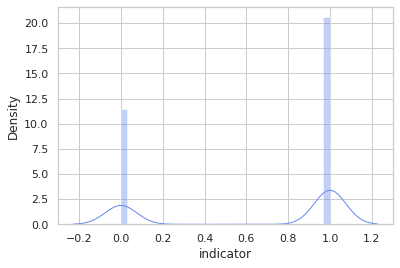

In [28]:
sns.distplot(data_labor["indicator"], kde=True, kde_kws={"lw": 1}, bins=32)
# sns.histplot(data=data_labor, x="erytrocyty", bins=24, kde=True)
print(f"[indicator] Medián:  ", data_labor["indicator"].median())
print(f"[indicator] Modus:   ", data_labor.mode()["indicator"][0])
print(f"[indicator] Priemer: ", data_labor["indicator"].mean())
print(f"[indicator] Rozptyl: ", np.var(data_labor["indicator"]))
print(f"[indicator] Smerodajná odchylka: ", np.std(data_labor["indicator"]))

Z danej krátkej analýzy dvoch atribútov sme zistili, že hodnoty indikátora sú
v očakávanej norme, kdežto hodnoty erytrocytov sa vymykajú normálu, a preto
**prílišne okrajové dáta vylúčime** v najbližšom kroku.

Okrem toho si aj rozdelíme dataset do **dvoch podsetov podľa hodnoty indikátora**.

#### Delenie atribútov do dvoch setov podľa indikátora:

In [29]:
data_0_erytrocyty = data_labor.loc[data_labor["indicator"] == 0, "erytrocyty"]

q_low = data_0_erytrocyty.quantile(0.01)
q_hi  = data_0_erytrocyty.quantile(0.99)
data_0_erytrocyty = data_0_erytrocyty[(data_0_erytrocyty < q_hi) & (data_0_erytrocyty > q_low)]

data_0_erytrocyty

0       8.89463
1       4.21847
2       7.94461
5       5.78198
17      3.89519
         ...   
9961    5.34416
9963    3.96481
9964    5.93103
9966    5.61728
9969    7.26178
Name: erytrocyty, Length: 3486, dtype: float64

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


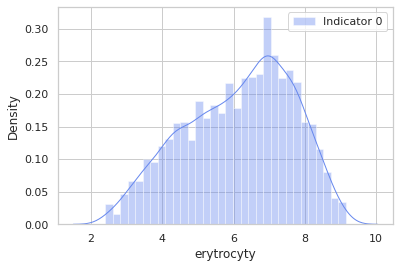

In [30]:
sns.distplot(data_0_erytrocyty, kde=True, kde_kws={"lw": 1}, bins=32, label="Indicator 0")
plt.legend()

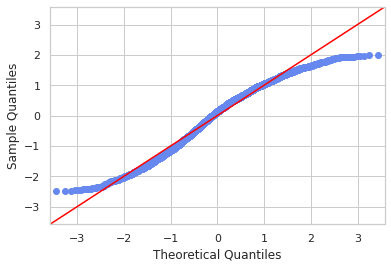

In [31]:
sm.qqplot(data_0_erytrocyty, fit=True, line="45")
plt.show()

In [32]:
data_1_erytrocyty = data_labor.loc[data_labor["indicator"] == 1, "erytrocyty"]
data_1_erytrocyty

3       7.67537
4       7.84993
6       5.61952
7       8.26529
8       6.25616
         ...   
9962    7.84604
9965    6.36163
9967    8.82840
9968    6.83179
9970    8.70299
Name: erytrocyty, Length: 6413, dtype: float64

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


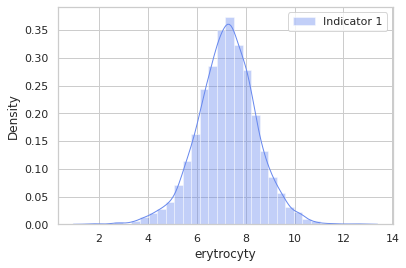

In [33]:
sns.distplot(data_1_erytrocyty, kde=True, kde_kws={"lw": 1}, bins=32, label="Indicator 1")
plt.legend()

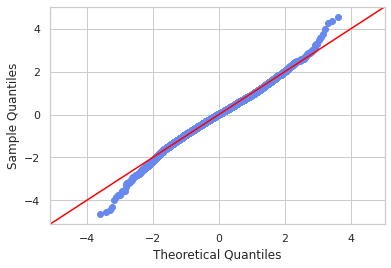

In [34]:
sm.qqplot(data_1_erytrocyty, fit=True, line="45")
plt.show()

Keďže sme si dáta rozdelili do dvoch setov podľa hypotézy, prešli sme na **overenie nulovej hypotézy**,
aby sme sa uistili, že dáta pochádzajú z normálnej distribúcie.

Na to nám slúži **Shapiro-Wilkov test**.

In [35]:
alpha = 0.05
shapiro_test = stats.shapiro(data_0_erytrocyty)
print(shapiro_test.pvalue)

if shapiro_test.pvalue > alpha:
    print('Normálna distribúcia (fail to reject H0)')
else:
    print('Iná distribúcia (reject H0)')

9.911477182859306e-24
Iná distribúcia (reject H0)


0.9940488934516907
1.063013855068175e-15
Iná distribúcia (reject H0)


/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


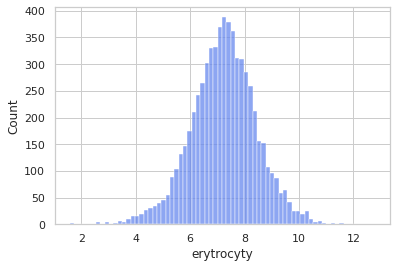

In [36]:
sns.histplot(data=data_1_erytrocyty)
alpha = 0.05
shapiro_test = stats.shapiro(data_1_erytrocyty)
print(shapiro_test.statistic)
print(shapiro_test.pvalue)

if shapiro_test.pvalue > alpha:
    print('Normálna distribúcia (fail to reject H0)')
else:
    print('Iná distribúcia (reject H0)')

Keďže podľa Shapiro-Wilkovho testu distribúcia oboch vzoriek **nepatrí
do skupiny normálnych** a naše dáta sú nepárové, pokračujeme testom, ktorý sa
nazýva **Mann-Whitneyho test**. Mann-Whitneyho test použijeme ako potvrdenie
výsledku SW testu.

Ohľadom výsledku Shapiro-Wilkovho testu je potrebné spomenúť, že tento test
nie je stavaný pre vzorky dát, ktoré obsahujú viac ako **5000 záznamov**,
čo v našom prípade bolo pravdou.

In [37]:
alpha = 0.05
stat, p = mannwhitneyu(data_0_erytrocyty, data_1_erytrocyty)

# interpret
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Different distribution (reject H0)


#### Záver 1. hypotézy

Mann-Whitneyho test potvrdil, že hypotézu **H0 môžeme zamietnuť**, vďaka čomu
môžeme tvrdiť, že pacienti v lepšom stave majú **nižšie hodnoty erytrocytov**
v krvi. Minimálne výsledné hodnoty oboch testov naznačujú fakt, že hypotéza
H0 nie je konzistentná a bola teda vyvrátená.


#### 2. Hypotéza:

Opäť sme začali iným typom zobrazenia závislostí medzi zvolenými atribútmi (tentokrát
šlo o indikátor a počet erytrocytov v krvi).

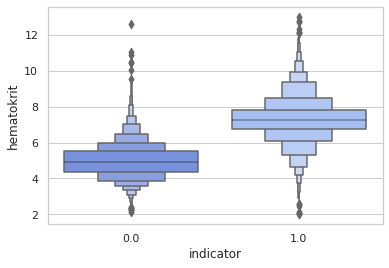

In [38]:
g = sns.boxenplot(data=data_labor, x='indicator', y = 'hematokrit')

Následne skontrolujeme atribúty indikátor a hematokrit a ich hodnoty, napr. či sú ich distribúcie
normálne alebo či ich dáta nezasahujú do záporných hodnôt, čo je z logického hľadiska nezmysel.

In [39]:
data_labor[['hematokrit', 'indicator']].describe()

,hematokrit,indicator
count,9971.000000,9971.000000
mean,6.461410,0.643165
std,1.617865,0.479090
min,1.991860,0.000000
25%,5.127505,0.000000
50%,6.753050,1.000000
75%,7.490275,1.000000
max,13.021170,1.000000


/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[hematokrit] Medián:   6.75305
[hematokrit] Modus:    6.461409967810079
[hematokrit] Priemer:  6.461409967810081
[hematokrit] Rozptyl:  2.617225818223387
[hematokrit] Smerodajná odchylka:  1.6177842310467077


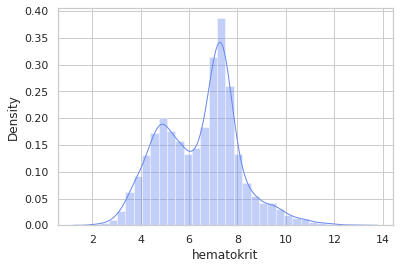

In [40]:
sns.distplot(data_labor["hematokrit"], kde=True, kde_kws={"lw": 1}, bins=32)
# sns.histplot(data=data_labor, x="erytrocyty", bins=24, kde=True)
print(f"[hematokrit] Medián:  ", data_labor["hematokrit"].median())
print(f"[hematokrit] Modus:   ", data_labor.mode()["hematokrit"][0])
print(f"[hematokrit] Priemer: ", data_labor["hematokrit"].mean())
print(f"[hematokrit] Rozptyl: ", np.var(data_labor["hematokrit"]))
print(f"[hematokrit] Smerodajná odchylka: ", np.std(data_labor["hematokrit"]))

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[indicator] Medián:   1.0
[indicator] Modus:    1.0
[indicator] Priemer:  0.6431651790191556
[indicator] Rozptyl:  0.22950373151641315
[indicator] Smerodajná odchylka:  0.479065477274676


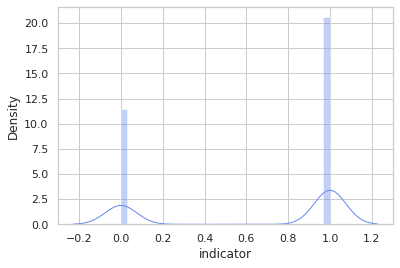

In [41]:
sns.distplot(data_labor["indicator"], kde=True, kde_kws={"lw": 1}, bins=32)
# sns.histplot(data=data_labor, x="erytrocyty", bins=24, kde=True)
print(f"[indicator] Medián:  ", data_labor["indicator"].median())
print(f"[indicator] Modus:   ", data_labor.mode()["indicator"][0])
print(f"[indicator] Priemer: ", data_labor["indicator"].mean())
print(f"[indicator] Rozptyl: ", np.var(data_labor["indicator"]))
print(f"[indicator] Smerodajná odchylka: ", np.std(data_labor["indicator"]))

Z tejto krátkej štatistickej analýzy sme zistili, že hodnoty oboch atribútov
sa pohybujú v očakávaných intervaloch, no distribúcia hematokritu nám naznačila
možný výsledok Shapiro-Wilkovho testu.

Následne sme si rozdelili dataset do **dvoch podsetov podľa hodnoty indikátora**.

In [42]:
data_0_hematokrit = data_labor.loc[data_labor["indicator"] == 0, "hematokrit"]
data_0_hematokrit

0       3.34206
1       5.78180
2       4.55230
5       4.77041
17      5.96378
         ...   
9961    5.96894
9963    5.13656
9964    3.47833
9966    4.57350
9969    4.98399
Name: hematokrit, Length: 3558, dtype: float64

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


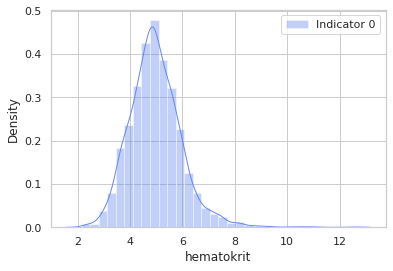

In [43]:
sns.distplot(data_0_hematokrit, kde=True, kde_kws={"lw": 1}, bins=32, label="Indicator 0")
plt.legend()

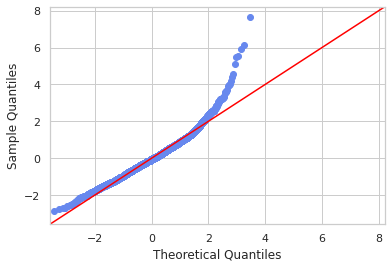

In [44]:
sm.qqplot(data_0_hematokrit, fit=True, line="45")
plt.show()

In [45]:
data_1_hematokrit = data_labor.loc[data_labor["indicator"] == 1, "hematokrit"]
data_1_hematokrit

3       7.17271
4       6.93681
6       7.60427
7       7.25248
8       6.92202
         ...   
9962    7.99329
9965    6.71859
9967    7.00122
9968    6.94466
9970    7.27724
Name: hematokrit, Length: 6413, dtype: float64

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


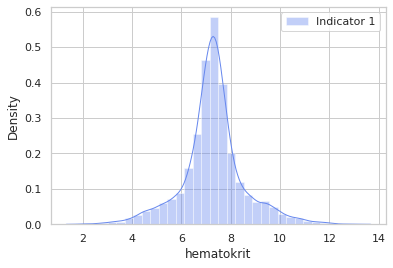

In [46]:
sns.distplot(data_1_hematokrit, kde=True, kde_kws={"lw": 1}, bins=32, label="Indicator 1")
plt.legend()

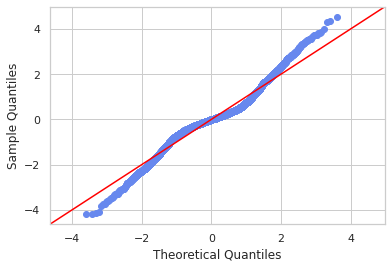

In [47]:
sm.qqplot(data_1_hematokrit, fit=True, line="45")
plt.show()

Z daných dát je očividná **rozdielnosť** týchto dvoch vzoriek ako aj ich **distribúcia**,
ktorá má od normálnosti pomerne ďaleko. Shapiro-Wilkov test overíme aj tak,
aby sme si mohli byť týmto tvrdením istí, že nejde o normálnu distribúciu.

0.9665696620941162
5.475998055323686e-28
Iná distribúcia (reject H0)


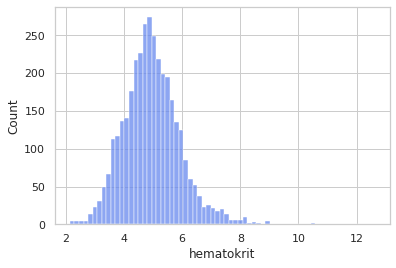

In [48]:
sns.histplot(data=data_0_hematokrit)
alpha = 0.05
shapiro_test = stats.shapiro(data_0_hematokrit)
print(shapiro_test.statistic)
print(shapiro_test.pvalue)

if shapiro_test.pvalue > alpha:
    print('Normálna distribúcia (fail to reject H0)')
else:
    print('Iná distribúcia (reject H0)')

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.9536169767379761
5.021272787215117e-41
Iná distribúcia (reject H0)


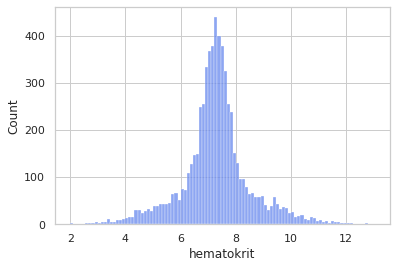

In [49]:
sns.histplot(data=data_1_hematokrit)
alpha = 0.05
shapiro_test = stats.shapiro(data_1_hematokrit)
print(shapiro_test.statistic)
print(shapiro_test.pvalue)

if shapiro_test.pvalue > alpha:
    print('Normálna distribúcia (fail to reject H0)')
else:
    print('Iná distribúcia (reject H0)')

Shapiro-Wilkov test nám vrátil **extrémne nízke p-hodnoty**, čo naznačuje vyvrátenie
nulovej hypotézy. Daný predpoklad sme si ešte potvrdili **Mann-Whitneyho testom**
v nasledujúcej bunke.

In [50]:
alpha = 0.05
stat, p = mannwhitneyu(data_0_hematokrit, data_1_hematokrit)

if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Different distribution (reject H0)


#### Záver 1. hypotézy

Mann-Whitneyho test potvrdil, že hypotézu **H0 môžeme zamietnuť** v prospech H1.
To znamená, že môžeme tvrdiť, že ak je pacient v horšom stave,
hodnoty objemu krviniek (hematokrit) sú vyššie.

## d) Identifikácia problémov v dátach s navrhnutým riešením
-------------------------------------------------------
### Identifikácia problémov

Táto sekcia prvej fázy je venovaná **čisteniu dát**, respektíve **hľadaniu problémov**
v datasete a vykonávanie riešení pre dané problémy.

Na úvod sme vykonali zopár základných príkazov, aby boli naše dáta ucelenejšie
(napr. náhrada stavu "divoced" za "divorced").

In [51]:
data_labor["relationship"] = data_labor["relationship"].str.replace("divoced", "divorced")

In [52]:
data_labor.head(10)

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,ssn,name,trombocyty,alp,relationship,indicator,er-cv,weight,ast,hematokrit
0,1.0,4.98718,8.89463,2.40520,5.75830,6.93712,4.54976,021-87-4523,Jeremy Tanner,6.23782,45.93625,divorced,0.0,55.43592,-2.73558,51.62366,3.34206
1,1.0,6.67732,4.21847,0.66072,6.29064,5.19990,4.10863,513-39-9691,Jocelyn Kelly,6.27100,20.30249,divorced,0.0,45.34617,81.56533,61.59374,5.78180
2,0.0,6.51444,7.94461,1.28337,5.83567,6.88758,6.45793,881-46-4810,Crystal Kelley,6.02783,82.09305,divorced,0.0,29.29190,151.24191,47.96329,4.55230
3,0.0,6.05025,7.67537,0.83197,6.33300,4.45912,6.96013,826-16-7757,Doris Duncan,6.83876,69.43441,divorced,1.0,60.47398,83.89451,57.47174,7.17271
4,1.0,6.20737,7.84993,0.93395,5.66904,4.88628,6.41332,167-37-6059,John Parks,5.75903,90.09567,divorced,1.0,41.10299,107.22958,34.25820,6.93681
5,0.0,6.43927,5.78198,0.38563,5.68222,3.97928,4.90713,289-95-2344,Shawn Richardson,6.70422,55.98531,divorced,0.0,70.18438,45.97264,43.98447,4.77041
6,1.0,6.20765,5.61952,0.54770,3.98821,6.22502,7.63128,684-70-5275,Janice Buchanan,7.42329,54.79463,single,1.0,52.69461,34.70731,70.42152,7.60427
7,0.0,4.31997,8.26529,1.53396,5.57558,4.13495,7.57753,555-32-3180,Catherine Jackson,5.60203,65.09512,married,1.0,49.80798,91.49829,67.64974,7.25248
8,0.0,4.82413,6.25616,0.54975,6.43054,5.79923,6.90669,479-42-8879,Amanda Garcia,6.36469,72.65451,widowed,1.0,54.45955,118.55927,44.94089,6.92202
9,0.0,5.74884,6.66503,0.52396,6.99089,5.59373,8.31328,375-27-0860,Travis Brown,5.38674,26.96196,married,1.0,42.93586,81.83422,38.56586,6.65939


V tejto bunke sme spočítali riadky, ktoré majú duplikát v celom datasete.

In [53]:
# data_labor.duplicated(keep=False).tail(50)
data_labor.duplicated(keep=False).sum()

198

Príkaz spustený v bunke nižšie kontroluje, či sú všetky hodnoty vo všetých stĺpcoch
numerické, vďaka čomu vieme prehlásiť, že dané stĺpce s numerickými hodnotami majú
jednotný formát.

V kombinácii spolu s data_labor.info() vieme potvrdiť, že ide o dátový typ float_64

In [54]:
# data_labor["smoker"].unique()
data_labor.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())

smoker           True
hbver            True
erytrocyty       True
alt              True
leukocyty        True
etytr            True
hemoglobin       True
ssn             False
name            False
trombocyty       True
alp              True
relationship    False
indicator        True
er-cv            True
weight           True
ast              True
hematokrit       True
dtype: bool

In [55]:
# Toto je (asi) check na to, aby zistil, či všetky hodnoty v stĺpci ssn sú dĺžky presne 11?
# Asi to je dobrý tip, ak chceme zisťovať jednotný formát
mask = data_labor["ssn"].str.findall("(\S{11})").astype(bool)
print(data_labor[mask])

      smoker    hbver  erytrocyty      alt  leukocyty    etytr  hemoglobin  \
0        1.0  4.98718     8.89463  2.40520    5.75830  6.93712     4.54976   
1        1.0  6.67732     4.21847  0.66072    6.29064  5.19990     4.10863   
2        0.0  6.51444     7.94461  1.28337    5.83567  6.88758     6.45793   
3        0.0  6.05025     7.67537  0.83197    6.33300  4.45912     6.96013   
4        1.0  6.20737     7.84993  0.93395    5.66904  4.88628     6.41332   
...      ...      ...         ...      ...        ...      ...         ...   
9966     1.0  5.17020     5.61728  0.60775    5.35296  4.59956     5.52802   
9967     0.0  5.70666     8.82840  2.35342    5.20966  3.73586     6.25482   
9968     1.0  6.45549     6.83179  0.62415    7.84688  4.52864     5.57765   
9969     1.0  4.81311     7.26178  0.84372    6.76794  7.54696     7.07142   
9970     0.0  5.96628     8.70299  2.09693    5.96586  3.76665     7.04030   

              ssn             name  trombocyty       alp relati

In [64]:
# Nejaké kontroly, či sú všetky mená, ssn a relationship stringy?

Tu budú riešenia pre chýbajúce (v podstate fixnuté na začiatku nahradením priemerom)
a vychýlené hodnoty.

In [56]:
# Tu je vzorka kódu ako cca by sme mohli nahradiť vychýlené dáta, napr. pre záporné váhy.
"""
for x in df.index:
  if df.loc[x, "Duration"] > 120:
    df.drop(x, inplace = True)
"""

'\nfor x in df.index:\n  if df.loc[x, "Duration"] > 120:\n    df.drop(x, inplace = True)\n'